In [60]:
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# The Dataset comes from:
# https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

In [61]:
def load(path_test, path_train):
  # Load up the data.
  with open(path_test, 'r')  as f: testing  = pd.read_csv(f)
  with open(path_train, 'r') as f: training = pd.read_csv(f)

  # The number of samples between training and testing can vary
  # But the number of features better remain the same!
  n_features = testing.shape[1]

  X_test  = testing.ix[:,:n_features-1]
  X_train = training.ix[:,:n_features-1]
  y_test  = testing.ix[:,n_features-1:].values.ravel()
  y_train = training.ix[:,n_features-1:].values.ravel()

  
  # Special
  # X_train = X_train.ix[:152,]
  # y_train = y_train[:153]

  return X_train, X_test, y_train, y_test


In [62]:
def peekData(X_train):
  # The 'targets' or labels are stored in y. The 'samples' or data is stored in X
  print ("Peeking into data...")
  fig = plt.figure()

  cnt = 0
  for col in range(5):
    for row in range(10):
      plt.subplot(5, 10, cnt + 1)
      plt.imshow(X_train.ix[cnt,:].values.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
      plt.axis('off')
      cnt += 1
 # fig.set_tight_layout(True)
  plt.show()

In [63]:
def drawPredictions(X_train, X_test, y_train, y_test):
  fig = plt.figure(figsize=(9, 9))

  # Make some guesses
  y_guess = model.predict(X_test)


  num_rows = 10
  num_cols = 5

  index = 0
  for col in range(num_cols):
    for row in range(num_rows):
      plt.subplot(num_cols, num_rows, index + 1)

      # 8x8 is the size of the image, 64 pixels
      plt.imshow(X_test.ix[index,:].values.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')

      # Green = Guessed right
      # Red = Fail!
      fontcolor = 'g' if y_test[index] == y_guess[index] else 'r'
      plt.title('Label: %i' % y_guess[index], fontsize=9, color=fontcolor)
      plt.axis('off')
      index += 1
 # fig.set_tight_layout(True)
  plt.show()

Peeking into data...


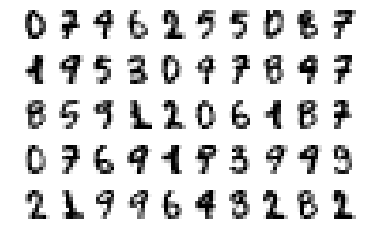

In [64]:
X_train, X_test, y_train, y_test = load('C:/Users/anshangu/Documents/GitHub/Python_LogisticReg/DataScience-with-Python/Handwritten_Digit_Recogniser/optdigits.tes', 
                                        'C:/Users/anshangu/Documents/GitHub/Python_LogisticReg/DataScience-with-Python/Handwritten_Digit_Recogniser/optdigits.tra')

peekData(X_train)

In [65]:
print ("Training SVC Classifier...")

model = SVC(kernel = 'poly', C=1, gamma = 0.001)
model.fit(X_train, y_train)



print ("Scoring SVC Classifier...")

score = model.score(X_test, y_test)
print ("Score:\n", score)

Training SVC Classifier...
Scoring SVC Classifier...
Score:
 0.974944320713


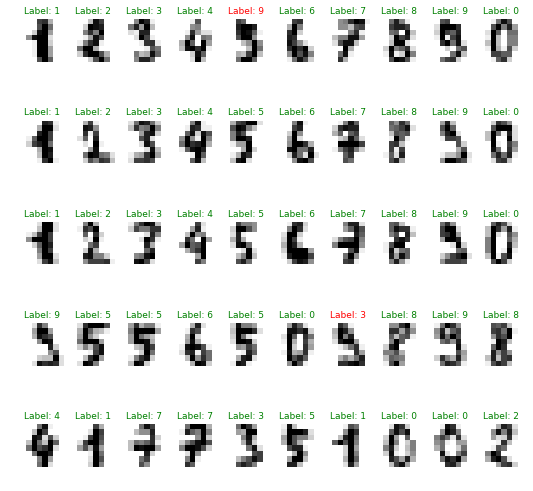

In [66]:
# Visual Confirmation of accuracy
drawPredictions(X_train, X_test, y_train, y_test)

1000th test label:  4
1000th test prediction:  [4]


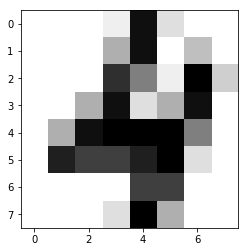

In [67]:
# Print the TRUE value of the 1000th digit in the test set
#
true_1000th_test_value = y_test[1000]

print ("1000th test label: ", true_1000th_test_value)



# Predict the value of the 1000th digit in the test set.

guess_1000th_test_value = model.predict(X_test.iloc[[1000]])
print ("1000th test prediction: ", guess_1000th_test_value)

# visually check if it was a hard image, or an easy image

plt.imshow(X_test.ix[1000,:].values.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()